In [2]:
import numpy as np
import pandas as pd
import spotipy as sp
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

##!conda install -c conda-forge spotipy

import config
import pandas
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [3]:
df = pd.read_csv('combined.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.432,0.884,8,-6.659,1,0.1300,0.012700,0.000527,0.1660,0.624,108.948,audio_features,5cZqsjVs6MevCnAkasbEOX,spotify:track:5cZqsjVs6MevCnAkasbEOX,https://api.spotify.com/v1/tracks/5cZqsjVs6Mev...,https://api.spotify.com/v1/audio-analysis/5cZq...,166707,4
1,0.465,0.977,7,-3.839,0,0.1750,0.001110,0.002980,0.2010,0.233,89.535,audio_features,6imjJij6aCM0IbbODUzJQn,spotify:track:6imjJij6aCM0IbbODUzJQn,https://api.spotify.com/v1/tracks/6imjJij6aCM0...,https://api.spotify.com/v1/audio-analysis/6imj...,284027,4
2,0.457,0.834,5,-4.674,0,0.0817,0.002520,0.001250,0.1000,0.201,140.032,audio_features,1H4Y9uW4N0LsxJUz0VnaPJ,spotify:track:1H4Y9uW4N0LsxJUz0VnaPJ,https://api.spotify.com/v1/tracks/1H4Y9uW4N0Ls...,https://api.spotify.com/v1/audio-analysis/1H4Y...,204677,4
3,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030,audio_features,6Nm8h73ycDG2saCnZV8poF,spotify:track:6Nm8h73ycDG2saCnZV8poF,https://api.spotify.com/v1/tracks/6Nm8h73ycDG2...,https://api.spotify.com/v1/audio-analysis/6Nm8...,222827,4
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004,audio_features,5anCkDvJ17aznvK5TED5uo,spotify:track:5anCkDvJ17aznvK5TED5uo,https://api.spotify.com/v1/tracks/5anCkDvJ17az...,https://api.spotify.com/v1/audio-analysis/5anC...,305907,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0.601,0.434,2,-11.291,1,0.0664,0.905000,0.408000,0.1360,0.926,128.928,audio_features,5pqe0gd0C0k3Q636nWSrCs,spotify:track:5pqe0gd0C0k3Q636nWSrCs,https://api.spotify.com/v1/tracks/5pqe0gd0C0k3...,https://api.spotify.com/v1/audio-analysis/5pqe...,278293,4
2095,0.477,0.320,3,-10.421,1,0.0770,0.960000,0.939000,0.0726,0.971,91.799,audio_features,2sNmaCsnkMHeuG4NcVEz3z,spotify:track:2sNmaCsnkMHeuG4NcVEz3z,https://api.spotify.com/v1/tracks/2sNmaCsnkMHe...,https://api.spotify.com/v1/audio-analysis/2sNm...,197000,3
2096,0.553,0.855,2,-5.394,1,0.0485,0.701000,0.000387,0.7200,0.971,122.043,audio_features,3kW6XrBALTASTUrgGw0Yu0,spotify:track:3kW6XrBALTASTUrgGw0Yu0,https://api.spotify.com/v1/tracks/3kW6XrBALTAS...,https://api.spotify.com/v1/audio-analysis/3kW6...,169627,4
2097,0.711,0.718,7,-8.508,1,0.0450,0.719000,0.925000,0.1020,0.964,115.365,audio_features,6tWVMFlSwTPVOgeWBQMapG,spotify:track:6tWVMFlSwTPVOgeWBQMapG,https://api.spotify.com/v1/tracks/6tWVMFlSwTPV...,https://api.spotify.com/v1/audio-analysis/6tWV...,209267,4


In [4]:
# Create a list of columns to exclude
exclude_columns = ['id','type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
# Create a new dataframe "audio_x" by dropping the specified columns
audio_x = df.drop(columns=exclude_columns)
audio_x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.432,0.884,8,-6.659,1,0.1300,0.012700,0.000527,0.1660,0.624,108.948
1,0.465,0.977,7,-3.839,0,0.1750,0.001110,0.002980,0.2010,0.233,89.535
2,0.457,0.834,5,-4.674,0,0.0817,0.002520,0.001250,0.1000,0.201,140.032
3,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004
...,...,...,...,...,...,...,...,...,...,...,...
2094,0.601,0.434,2,-11.291,1,0.0664,0.905000,0.408000,0.1360,0.926,128.928
2095,0.477,0.320,3,-10.421,1,0.0770,0.960000,0.939000,0.0726,0.971,91.799
2096,0.553,0.855,2,-5.394,1,0.0485,0.701000,0.000387,0.7200,0.971,122.043
2097,0.711,0.718,7,-8.508,1,0.0450,0.719000,0.925000,0.1020,0.964,115.365


In [5]:
X = audio_x

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.432,0.884,8,-6.659,1,0.1300,0.012700,0.000527,0.1660,0.624,108.948
1,0.465,0.977,7,-3.839,0,0.1750,0.001110,0.002980,0.2010,0.233,89.535
2,0.457,0.834,5,-4.674,0,0.0817,0.002520,0.001250,0.1000,0.201,140.032
3,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.666703,0.962123,0.781578,0.428354,0.807128,0.645448,-0.839044,-0.667717,-0.100382,0.498961,-0.338668
1,-0.477601,1.300342,0.496020,0.897375,-1.238961,1.225344,-0.871108,-0.661027,0.137592,-0.969199,-0.977340
2,-0.523443,0.780284,-0.075097,0.758498,-1.238961,0.023028,-0.867207,-0.665745,-0.549133,-1.089356,0.683970
3,0.244426,1.249427,-1.502889,0.456629,-1.238961,-0.345528,-0.873937,-0.668863,-0.698037,0.442638,0.190416
4,0.181392,1.078499,-0.646214,0.811055,-1.238961,-0.531094,-0.873357,-0.598519,-0.372353,0.720500,-0.040733


In [7]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1234)

In [8]:
labels = kmeans.labels_
labels

array([0, 2, 3, ..., 4, 0, 0])

In [9]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

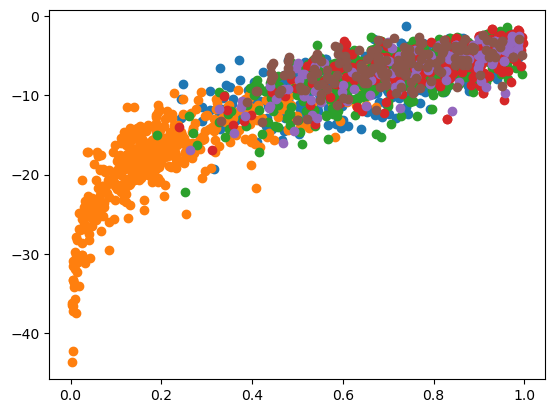

In [10]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [11]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    549
1    448
2    458
3    351
4    122
5    171
dtype: int64

In [12]:
clusters

array([0, 2, 3, ..., 4, 0, 0])

In [13]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.432,0.884,8,-6.659,1,0.1300,0.012700,0.000527,0.1660,0.624,108.948,0
1,0.465,0.977,7,-3.839,0,0.1750,0.001110,0.002980,0.2010,0.233,89.535,2
2,0.457,0.834,5,-4.674,0,0.0817,0.002520,0.001250,0.1000,0.201,140.032,3
3,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030,2
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0.601,0.434,2,-11.291,1,0.0664,0.905000,0.408000,0.1360,0.926,128.928,0
2095,0.477,0.320,3,-10.421,1,0.0770,0.960000,0.939000,0.0726,0.971,91.799,1
2096,0.553,0.855,2,-5.394,1,0.0485,0.701000,0.000387,0.7200,0.971,122.043,4
2097,0.711,0.718,7,-8.508,1,0.0450,0.719000,0.925000,0.1020,0.964,115.365,0


In [14]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
670,0.772,0.75,5,-3.67,0,0.0455,0.0201,0.0,0.074,0.587,114.061,2


In [15]:
kmeans.inertia_

12051.545870206708

In [16]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

15342.5043700836


Training a K-Means model with 2 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

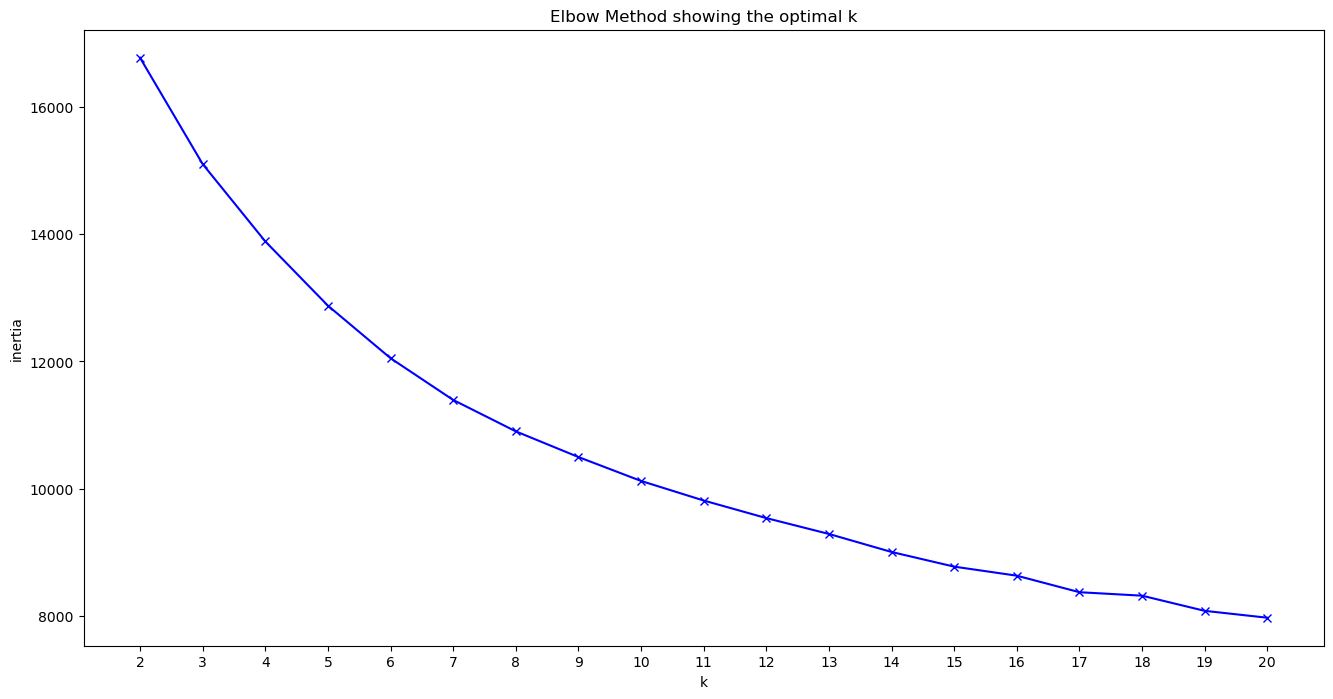

In [17]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Calculating silhouette score for K-Means model with 2 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 3 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 4 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 5 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 6 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 7 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 8 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 9 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 10 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 11 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 12 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 13 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 14 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 15 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 16 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 17 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 18 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 19 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 20 clusters! 



C:\Users\ivann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


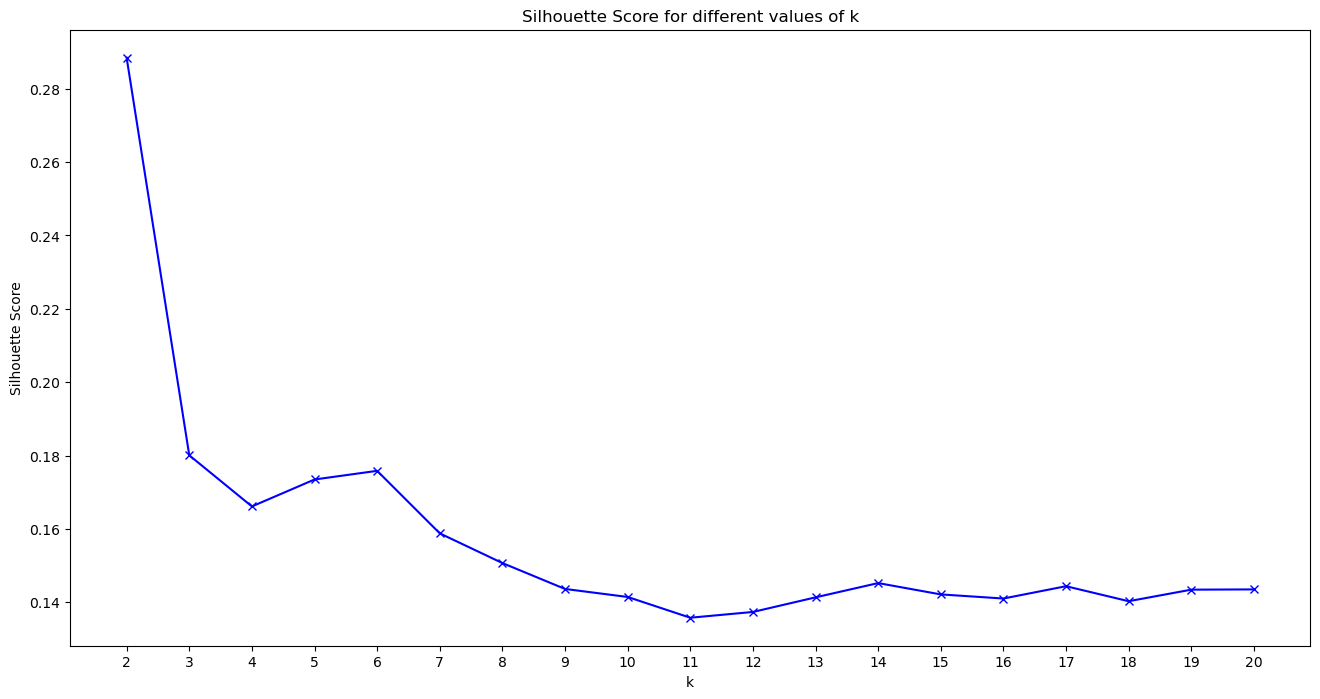

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in K:
    print("Calculating silhouette score for K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_scaled_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled_df, labels))
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for different values of k')
plt.show()

In [21]:
new_df = pd.concat([X, df['id']], axis=1)

In [22]:
new_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,id
0,0.432,0.884,8,-6.659,1,0.1300,0.012700,0.000527,0.1660,0.624,108.948,0,5cZqsjVs6MevCnAkasbEOX
1,0.465,0.977,7,-3.839,0,0.1750,0.001110,0.002980,0.2010,0.233,89.535,2,6imjJij6aCM0IbbODUzJQn
2,0.457,0.834,5,-4.674,0,0.0817,0.002520,0.001250,0.1000,0.201,140.032,3,1H4Y9uW4N0LsxJUz0VnaPJ
3,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030,2,6Nm8h73ycDG2saCnZV8poF
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004,2,5anCkDvJ17aznvK5TED5uo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,0.601,0.434,2,-11.291,1,0.0664,0.905000,0.408000,0.1360,0.926,128.928,0,5pqe0gd0C0k3Q636nWSrCs
2095,0.477,0.320,3,-10.421,1,0.0770,0.960000,0.939000,0.0726,0.971,91.799,1,2sNmaCsnkMHeuG4NcVEz3z
2096,0.553,0.855,2,-5.394,1,0.0485,0.701000,0.000387,0.7200,0.971,122.043,4,3kW6XrBALTASTUrgGw0Yu0
2097,0.711,0.718,7,-8.508,1,0.0450,0.719000,0.925000,0.1020,0.964,115.365,0,6tWVMFlSwTPVOgeWBQMapG


In [ ]:
from IPython.display import IFrame
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
song_input = input("Please, enter the song title: ")
user_input = sp.search(q= song_input, type='track', limit=1)
song_id = user_input ["tracks"]["items"][0]["id"]
song_id
display(play_song(song_id))
verified = input("Is this your song? (yes/no): ")
if verified.lower() == "yes":
    # Collect song features
    song_features = sp.audio_features([song_id])[0]
    # Create a DataFrame with the song features
    user_song = pd.DataFrame(song_features, index=[0])
    # Print the user_song DataFrame
    print("\nUser Song Features:")
    print(user_song)


In [ ]:
exclude = ['type', 'id','uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
user=pd.DataFrame([song_features]).drop(columns=exclude)
user

In [38]:
user_scaled = scaler.transform(user)
user_scaled_df = pd.DataFrame(user_scaled, columns=user.columns)
# Display the scaled user DataFrame
print("\nScaled User Song Features:")
user_scaled_df


Scaled User Song Features:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.116587,1.256701,1.638253,0.207981,-1.238961,-0.430579,-0.484099,2.017159,-0.687158,0.360031,0.553459


In [40]:
# Apply KMeans prediction to user_scaled_df
user_cluster = kmeans2.predict(user_scaled_df)
# Filter recommended songs based on predicted cluster
recommended_songs = new_df[new_df['cluster'] == user_cluster[0]]
# Select a random song from recommended songs
recommended_song = recommended_songs.sample(n=1)
# Retrieve track_id of recommended song
recommended_track_id = recommended_song['id'].values[0]
# Display the recommended song
display(play_song(recommended_track_id))